# 匯入資料及套件

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#匯入顧客對商品評分的資料
my_df = pd.read_csv("retailer_ratings.csv",encoding='utf-8')
my_df['StockCode'] = my_df['StockCode'].apply(lambda x : str(x))
my_df

,CustomerID,StockCode,ProductName,quantity_Quartile,price_Quartile,buy_index_Quartile,rating
0,1,22664,龍口埔里水粉400g,3,1,2,2.0
1,1,22294,康乃馨夜用特長超薄蝶型(14片x4包),3,4,4,3.9
2,1,21385,家樂福哥斯大黎加濾泡式咖啡粉,2,2,3,2.8
3,1,21107,木柄菜匙,2,1,2,1.9
4,1,22379,美琪天然T3抗菌洗手乳,2,2,4,3.6
...,...,...,...,...,...,...,...
397222,18287,22866,啵樂樂乳酸飲料-蘋果味-235ml,4,1,5,4.5
397223,18287,23264,防蹣抗菌記憶床墊平面10公分-單人,5,5,4,4.2
397224,18287,21819,狗家族繡絨毛巾-藍色,5,2,4,3.9
397225,18287,23223,Adidas Training加重訓練護腕/護踝0.5kg,5,5,3,3.4


In [3]:
#匯入商品ID與名稱的資料
product_name = pd.read_csv("product_name.csv",encoding='utf-8')
product_name['StockCode'] = product_name['StockCode'].apply(lambda x : str(x))
product_name

,StockCode,ProductName
0,22664,龍口埔里水粉400g
1,22294,康乃馨夜用特長超薄蝶型(14片x4包)
2,21385,家樂福哥斯大黎加濾泡式咖啡粉
3,21107,木柄菜匙
4,22379,美琪天然T3抗菌洗手乳
...,...,...
3909,23664,風獅爺 一條根滾珠凝露-熱-40g
3910,21310,遠東FET男抗菌寬肩背心-M
3911,84613C,愛心園芋頭饅頭 4入
3912,84206B,【濕紙巾】康乃馨寶寶潔膚濕巾補充包


# 做圖觀察整體評分趨勢

In [4]:
# 建立每個商品的平均評分
ratings = my_df.groupby('StockCode').agg({'rating':lambda x:x.mean()})
ratings

,rating
StockCode,
10002,1.908065
10080,1.470000
10120,1.496000
10123C,1.533333
10124A,1.580000
...,...
gift_0001_10,1.200000
gift_0001_20,1.400000
gift_0001_30,1.100000


In [5]:
ratings['number_of_ratings'] = my_df.groupby('StockCode').agg({'rating': lambda x : x.count()})
ratings

,rating,number_of_ratings
StockCode,,
10002,1.908065,62.0
10080,1.470000,20.0
10120,1.496000,25.0
10123C,1.533333,3.0
10124A,1.580000,5.0
...,...,...
gift_0001_10,1.200000,8.0
gift_0001_20,1.400000,9.0
gift_0001_30,1.100000,7.0


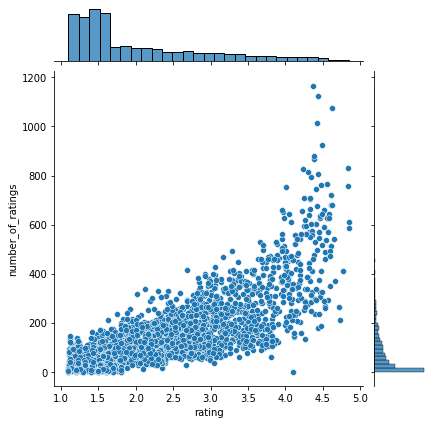

In [6]:
# 做圖觀察每個評分區段的人數 -->這邊可看出整體評分偏低
sns.jointplot(x = 'rating', y = 'number_of_ratings', data = ratings)

# 以商品的相關性推薦商品給顧客

In [7]:
#做出顧客對商品的評分矩陣
retailer_matrix_UII = my_df.pivot_table(index = 'CustomerID', columns = 'StockCode', values = 'rating')
retailer_matrix_UII

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DCGS0069,DCGS0070,DCGS0076,DCGSSBOY,DCGSSGIRL,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 找出與某樣商品最相關的30樣商品
def get_recommend_item(item):
    item_user_rating = retailer_matrix_UII[item]
    similer_to_item = retailer_matrix_UII.corrwith(item_user_rating)
    corr_item = pd.DataFrame(similer_to_item, columns = ['Correlation'])
    corr_item.dropna(inplace=True)
    corr_item = corr_item.join(ratings['number_of_ratings'])
    top30 = corr_item[corr_item['number_of_ratings']  > 30].sort_values(by = 'Correlation', ascending = False).head(31)
    #top30 = top30.drop(index=item).reset_index(drop=False)
    return top30

# DEMO
get_recommend_item('10124A')

,Correlation,number_of_ratings
StockCode,,
85049G,1.000000e+00,192.0
82494L,1.000000e+00,491.0
22114,1.000000e+00,454.0
21993,1.000000e+00,371.0
20728,1.000000e+00,663.0
21975,1.000000e+00,359.0
23006,1.000000e+00,131.0
22189,1.000000e+00,346.0
22417,1.000000e+00,383.0


In [9]:
# 針對每一項使用者購買的商品，找出與其相似的30樣商品 --> 剔除原使用者購買過的商品 --> 依商品的相關性排名做推薦
def item_based_recommend(user,n):
    user_items = my_df.groupby(by = 'CustomerID')['StockCode'].apply(lambda x:','.join(x))
    items_bought_by_user = user_items[user].split(',')
    df_tmp = pd.DataFrame(columns=['StockCode','Correlation','number_of_ratings','ProductName'])
    for i in items_bought_by_user:
        a = get_recommend_item(i)
        b = pd.merge(a,product_name,on = 'StockCode')
        df_tmp = df_tmp.append(b)
    df_tmp.drop_duplicates(subset=['StockCode'],inplace=True)
    for i in items_bought_by_user:
        df_tmp.drop(index = list(df_tmp[df_tmp['StockCode']== i].index),inplace=True)
    df_tmp = df_tmp[df_tmp['Correlation'] < 1].sort_values(by='Correlation',ascending=False).head(n).reset_index(drop=True)
    return df_tmp

item_based_recommend(18280,10)

,StockCode,Correlation,number_of_ratings,ProductName
0,21926,1.0,35.0,天仁台灣茗品翠玉烏龍茶
1,20757,1.0,33.0,有機紅晶冰糖
2,23324,1.0,43.0,好自在隱型透氣無香護墊(40片/包)
3,85180A,1.0,58.0,高級40頁資料冊-綠色
4,20681,1.0,42.0,浤良松花皮蛋-220g
5,23056,1.0,35.0,尚朋堂SA-2258DC空氣清淨機
6,22454,1.0,35.0,媚點優雅玫色修容餅RS-03
7,21678,1.0,32.0,爭鮮毛豆
8,22641,1.0,36.0,舒適牌創 4紀鈦型男刮鬍刀片
9,35923,1.0,51.0,高樂氏CLOROX居家殺菌濕紙巾-柑橘香-75PC
